## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> objective: Exploring and analyzing the data to discover key factors responsible for customer churn and coming up with ways/recommendations to ensure customer retention. </b>

#Understanding the business problem
1. Customer churn in the telecom industry poses one of the most significant risks 
of loss of revenue. 
2. The average churn rate in the telecom industry is approximately 1.9% per month. (US Data) 
3. Since the cost of acquiring new customers is up to 25 times higher than the cost of retaining them, fostering customer loyalty is key. 
4. With low switching costs and an abundance of alternative providers increased the rate of customer churn.



In [17]:
# importing libraries Numpy, Pandas, Matplotlib and seaborn with ailas np, pd, plt and sns respectively
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# importing drive from google.colab for fetching csv file from google drive
from google.colab import drive

In [19]:
# mounting google drive with google colab
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
# loading data from csv
path = "/content/drive/My Drive/"
df = pd.read_csv(path + "Telecom Churn.csv")

In [21]:
# inspecting loaded data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
# brief info about all the column in dataset
df.describe(include="all")

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


#Detailed information about features of the dataset:
STATE: 51 Unique States name

Account Length: Length of The Account

Area Code: Code Number of Area having some States

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

Total day minutes: Total Number of Minutes Spent in Morning

Total day calls: Total Number of Calls made in Morning.

Total day charge: Total Charge to the Customers in Morning.

Total eve minutes: Total Number of Minutes calls in Evening

Total eve calls: Total Number of Calls made in Evening.

Total eve charge: Total Charge to the Customers in Morning.

Total night minutes: Total Number of Minutes calls in the Night.

Total night calls: Total Number of Calls made in Night.

Total night charge: Total Charge to the Customers in Night.

Total intl minutes: Total Number of international calls in Minutes.

Total intl calls: Total number of international calls made.

Total intl charge: Total charges for international calls.

Customer service calls Number of customer service calls made by customer

Churn Customer Churn, True means churned customer, False means retained customer

In [23]:
# getting the shape of the data(Number of row and columns)
df.shape

(3333, 20)

In [30]:
# getting information about what type of various columns we have in as variable
col = df.columns
print(col)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [25]:
# inspecting unique values of all the columns
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [26]:
# check for null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [27]:
# datatype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

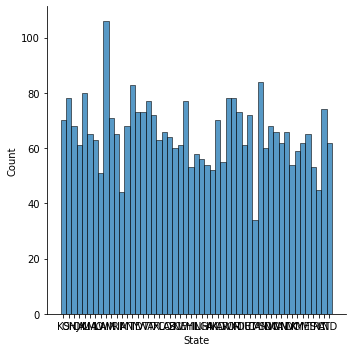

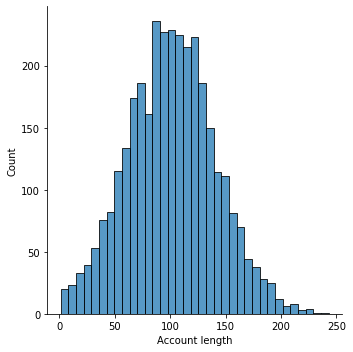

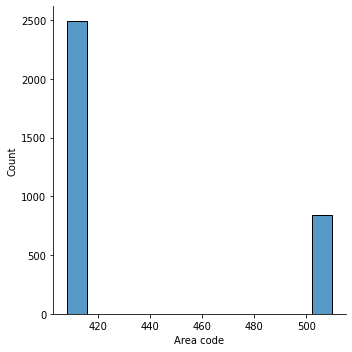

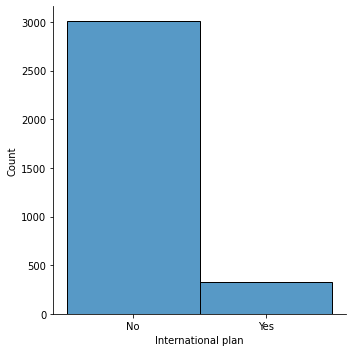

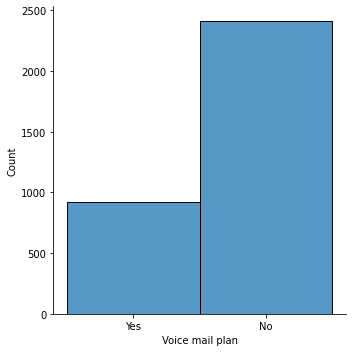

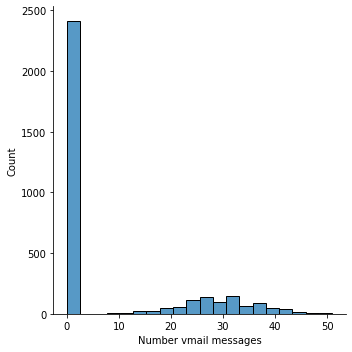

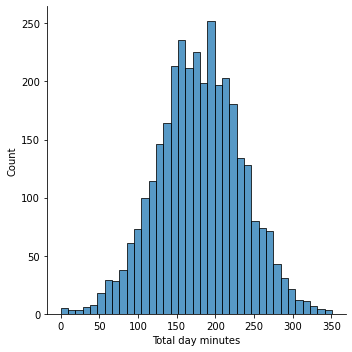

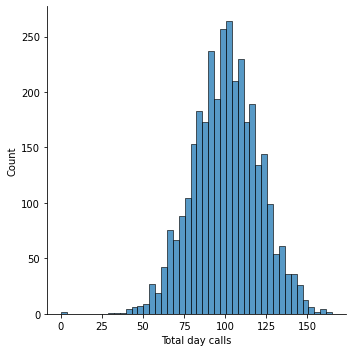

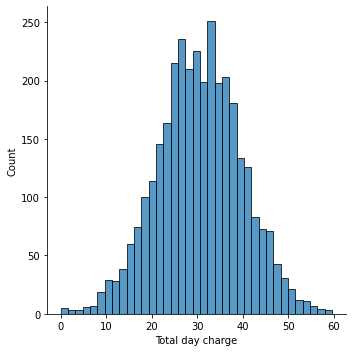

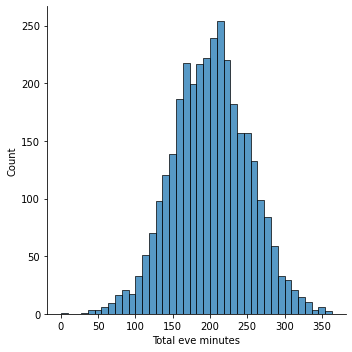

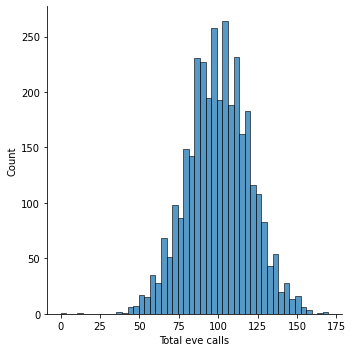

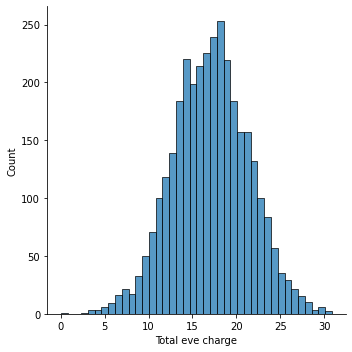

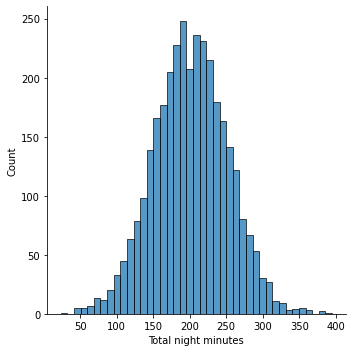

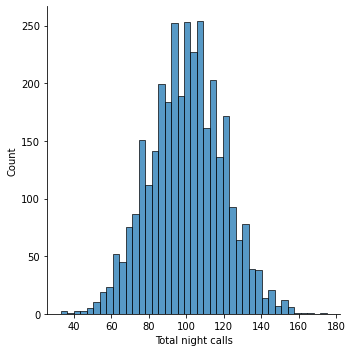

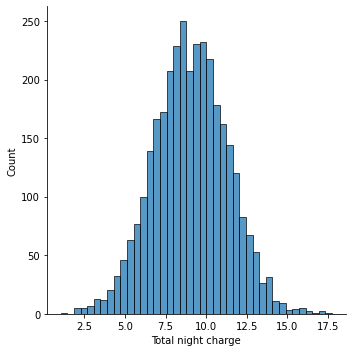

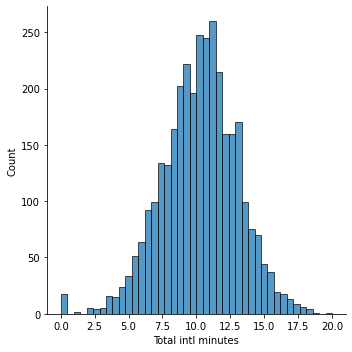

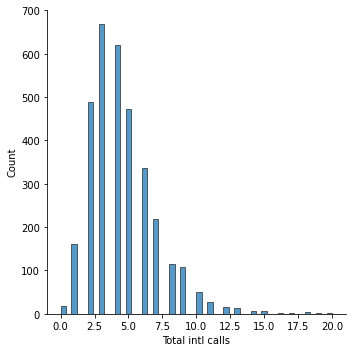

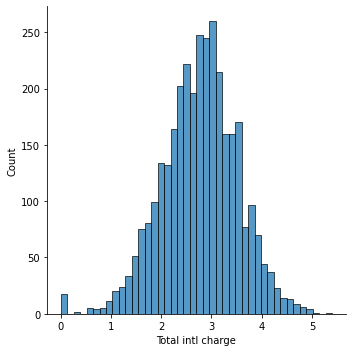

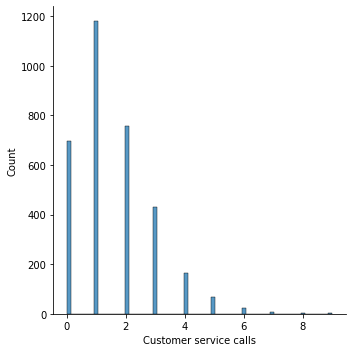

In [32]:
#distribution of all the colunms
colms = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
for colm in colms:
  sns.displot(x=df[colm])

In [ ]:
# Number of churn and not churned customers
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

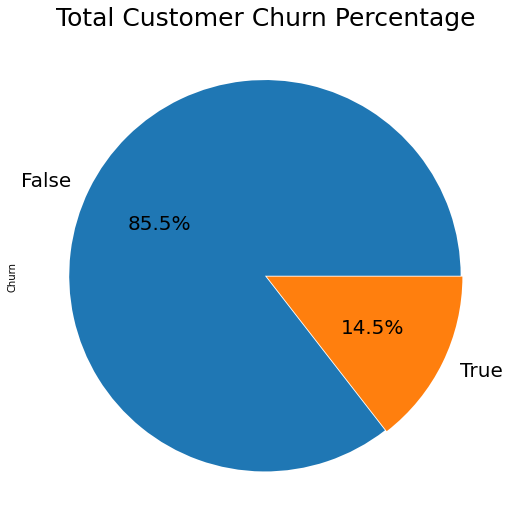

In [ ]:
# ploting the pie plot for percent of churned and not churned customers
df["Churn"].value_counts().plot.pie(explode=[0.005, 0.005],  autopct= "%1.1f%%", figsize= (9, 9), fontsize=20)
plt.title("Total Customer Churn Percentage", fontsize=25)
plt.show()

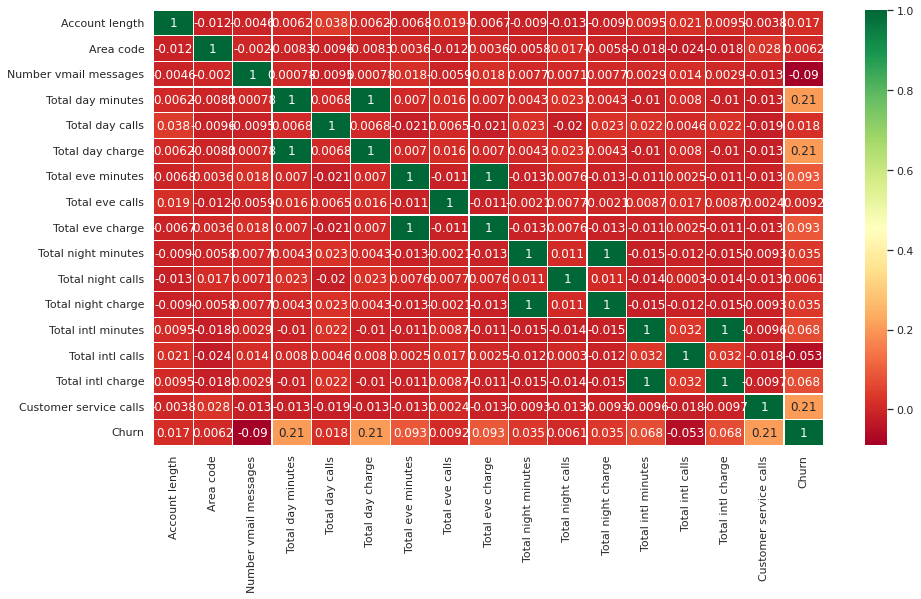

In [ ]:
# ploting heatmap for analyzing correlation between the variables
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# **Observation:** This heat map shows there is high correlation between churn and Total day minute/Total day charge, total eve calls and total eve charge and customer service calls

# For better understanding of correlation we will use pairplot

In [ ]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="Churn", height=4)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Figure size 1440x1440 with 0 Axes>

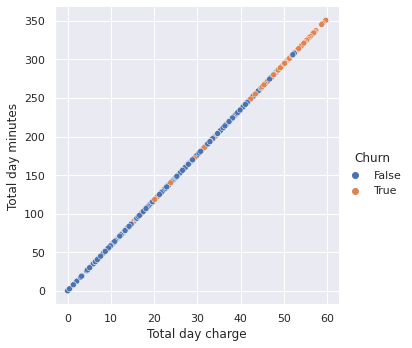

In [ ]:
# plot between Total Day Minutes, Total day Charges, and Churn
sns.set(style="darkgrid")
plt.figure(figsize=(20,20))
mx = sns.relplot(x="Total day charge", y="Total day minutes", hue="Churn", data=df);
plt.show()

# **Observation**: This plot show that how higher total day minutes or total day charge is responsible for customer chrun. A simple model can also be made using if else to predice if the customer get churned or not.

<Figure size 1440x1440 with 0 Axes>

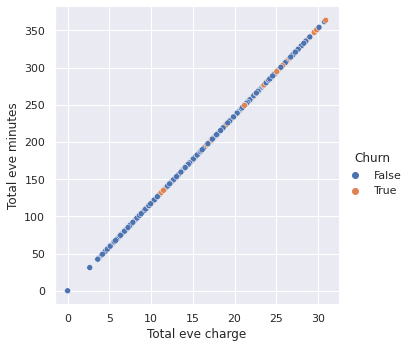

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,20))
mx = sns.relplot(x="Total eve charge", y="Total eve minutes", hue="Churn", data=df);
plt.show()

# **Observation**: Data shows there is no significant relation between Total eve minutes with churn.

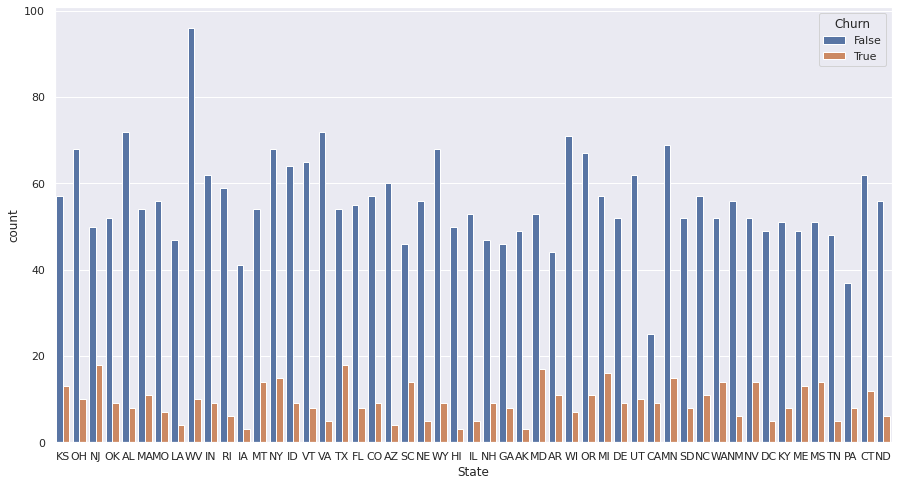

In [ ]:
# ploting count plot for churned and not churned customers state wise
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df)
plt.show()

In [ ]:
State_percentage_churn = pd.crosstab(df['State'], df['Churn'] )
State_percentage_churn["Statewise_churn"] = State_percentage_churn.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
top_five_churn_states= State_percentage_churn.sort_values(by="Statewise_churn", ascending=False)
top_five_churn_states.head(10)

Churn,False,True,Statewise_churn
State,,,
NJ,50,18,26.470588
CA,25,9,26.470588
TX,54,18,25.000000
MD,53,17,24.285714
SC,46,14,23.333333
MI,57,16,21.917808
MS,51,14,21.538462
NV,52,14,21.212121
WA,52,14,21.212121


# **Observations**: With the help of above drawn plot  and observing customer churn percentage we can say that:-

## 1. State NJ (New Jersey) has highest churn rate.
## 2. State CA (California) is having 2nd highest churn rate.
## 3. TX, MD and SC are also in the list of high churn states.

## High churn of customers in these states indicates that either these states have high competition ( other companies offering cheaper rates or better network coverage) or in these states company have poor network coverage.

In [ ]:
# calculating per minute charge for diffrent category of calls   
day_charge_per_minutes = df['Total day charge'].sum()/df['Total day minutes'].sum()
eve_charge_per_minutes = df['Total eve charge'].sum()/df['Total eve minutes'].sum()
night_charge_per_minutes = df['Total night charge'].sum()/df['Total night minutes'].sum()
int_charge_per_minutes = df['Total intl charge'].sum()/df['Total intl minutes'].sum()

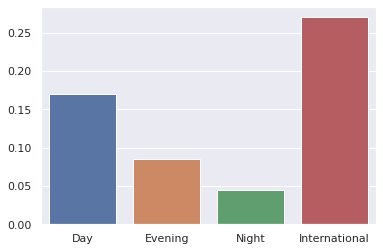

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_per_minutes,eve_charge_per_minutes,night_charge_per_minutes,int_charge_per_minutes])

# From the above graph we can see that international call charges are high as compared to other call charges so in next step we need to analyze if there is churn because of international calls or not.

In [ ]:
int_call_user_percentage_churn = pd.crosstab(df['International plan'], df['Churn'] )
int_call_user_percentage_churn["internation_call_churn"] = int_call_user_percentage_churn.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
int_call_user_percentage_churn.sort_values(by="internation_call_churn", ascending=False)

Churn,False,True,internation_call_churn
International plan,,,
Yes,186,137,42.414861
No,2664,346,11.495017


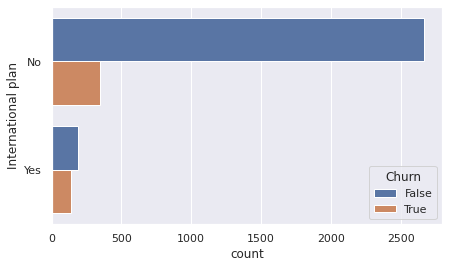

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(7,4))
ploting_int_plan = sns.countplot(y="International plan", hue="Churn", data=df)
plt.show()

#Obersvation: Plot shows that 42.41% of customers who have international calling plan have churned and 11.49 % of customers churned who don’t have international calling plan.

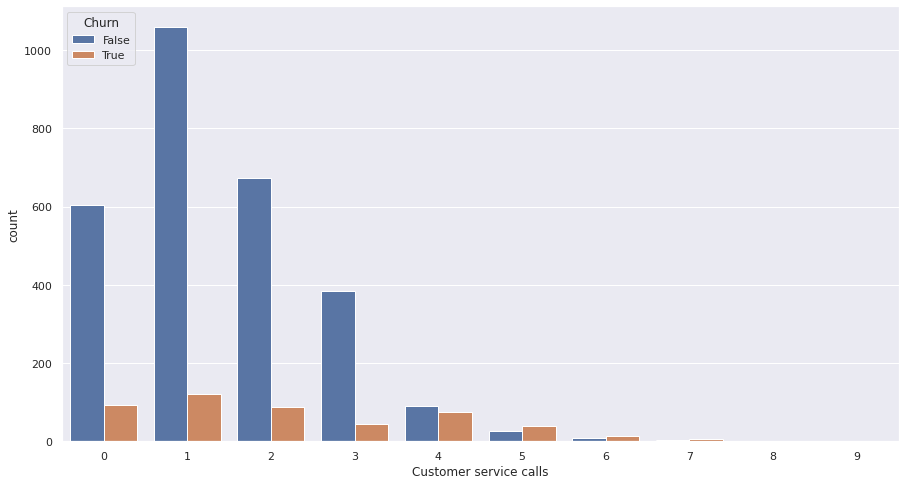

In [ ]:
# ploting count plot for churned and not churned customers with increase in no of customer service calls.
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Customer service calls', hue="Churn", data=df)
plt.show()

In [ ]:
service_calls_percentage_churn = pd.crosstab(df['Customer service calls'], df['Churn'] )
service_calls_percentage_churn["Customercalls_wise_churn"] = service_calls_percentage_churn.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
top_churn= service_calls_percentage_churn.sort_values(by="Customercalls_wise_churn", ascending=False)
top_churn.head(10)

Churn,False,True,Customercalls_wise_churn
Customer service calls,,,
9,0,2,100.000000
6,8,14,63.636364
5,26,40,60.606061
7,4,5,55.555556
8,1,1,50.000000
4,90,76,45.783133
0,605,92,13.199426
2,672,87,11.462451
1,1059,122,10.330229


#Obersvation: Data shows that if there are more 3 customer service calls the churn increases.

# **Final Recommendations:-**

## 1. As per observation churn is high when the customer's Total Calling minutes per day is high. There may be some competitors who are offering cheaper calling rates so company should come up with optimal calling rate or launch a calling specific plan for customer retention.

## 2. In states (NJ, CA, TX, MD, SC ) where churn is high company needs to inspect if there is low network penetration or competitor are offering cheaper prices.

## 3. Customer with international calling plan churn 200% more than normal customers so this needs to be addressed with optimal international calling rate.

## 4. When there are more than 3 service calls the churn increases which mean there is need of resolving customers concerns for customer retention and satisfaction which lead to reduction in customer churn.